<a href="https://colab.research.google.com/github/2320030014/OIBSIP/blob/main/Project_3_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn folium plotly jupyterlab xgboost shap joblib


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,48645.0,NaN,NaN,NaN,19016693.875527,2539.0,9473889.0,19674485.0,29144832.0,36487245.0,10979907.607739
name,48629,47657,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48645.0,NaN,NaN,NaN,67614410.731977,2438.0,7825587.0,30812164.0,107434423.0,274321313.0,78600395.028656
host_name,48624,11412,Michael,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48645,221,Williamsburg,3910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48645.0,NaN,NaN,NaN,40.728938,40.49979,40.69002,40.72297,40.76313,40.91306,0.05457
longitude,48645.0,NaN,NaN,NaN,-73.952052,-74.24442,-73.98298,-73.9556,-73.93613,-73.71299,0.046167
price,48645.0,NaN,NaN,NaN,141.311789,10.0,69.0,105.0,175.0,1000.0,116.73133
minimum_nights,48645.0,NaN,NaN,NaN,6.973461,1.0,1.0,3.0,5.0,1250.0,20.267263
number_of_reviews,48645.0,NaN,NaN,NaN,23.354836,0.0,1.0,5.0,24.0,629.0,44.631191


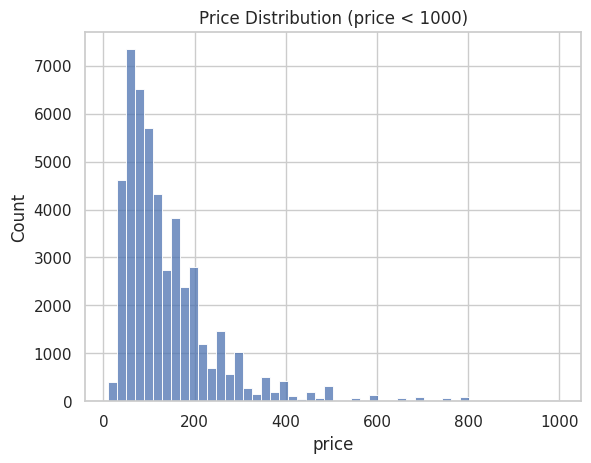

In [ ]:
sns.histplot(df[df.price < 1000].price, bins=50)
plt.title("Price Distribution (price < 1000)")
plt.show()

In [ ]:
import datetime
today = pd.to_datetime("2019-12-31")  # since dataset is 2019, pick a cutoff date
df['days_since_last_review'] = (today - df['last_review']).dt.days
df['days_since_last_review'] = df['days_since_last_review'].fillna(9999)

# log price
df['log_price'] = np.log1p(df['price'])

# cap extreme prices (optional)
df = df[df['price'] <= 1000]


In [ ]:
# Drop or fill missing
df = df[df.price > 0].copy()  # Remove invalid prices
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

max_date = df['last_review'].max()
df['days_since_last_review'] = (max_date - df['last_review']).dt.days.fillna(-1)

# Cap price at 99th percentile
cap = df.price.quantile(0.99)
df['price_capped'] = np.where(df.price > cap, cap, df.price)

# Confirm
df[['price','price_capped','days_since_last_review']].head()

,price,price_capped,days_since_last_review
0,149,149.0,262.0
1,225,225.0,48.0
2,150,150.0,-1.0
3,89,89.0,3.0
4,80,80.0,231.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def rmse(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Ridge RMSE:", rmse(y_test, y_pred))
print("Ridge MAE:", mean_absolute_error(y_test, y_pred))


Ridge RMSE: 0.4619462112552535
Ridge MAE: 0.3493248656976249


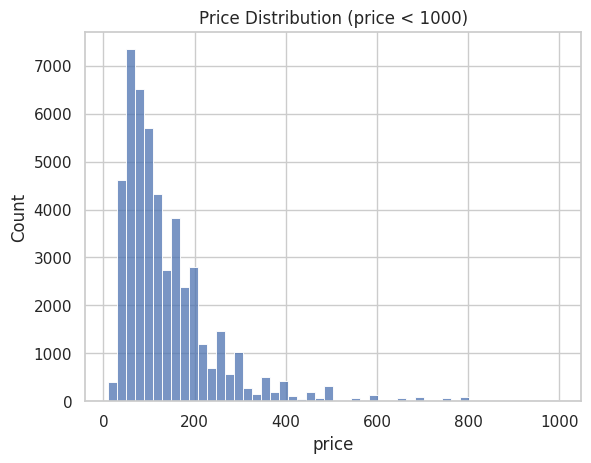

In [ ]:
sns.histplot(df[df.price < 1000].price, bins=50)
plt.title("Price Distribution (price < 1000)")
plt.show()

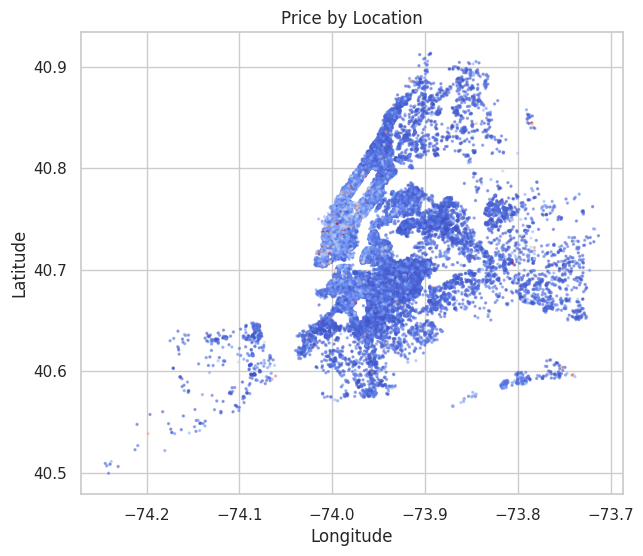

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(df.longitude, df.latitude, c=df.price, cmap='coolwarm', s=2, alpha=0.5)
plt.title('Price by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Second Data Set

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CA_category_id.json to CA_category_id.json


In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm nltk spacy gensim pyLDAvis wordcloud plotly streamlit prophet jupyterlab joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.0 MB/s eta 0:00:00


In [ ]:
# src/data_utils.py
import pandas as pd
import json
from pathlib import Path

def load_videos_csv(path):
    df = pd.read_csv(path, parse_dates=['trending_date','publish_time'], low_memory=False)
    return df

def load_category_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    # flatten id -> title
    mapping = {item['id']: item['snippet']['title'] for item in data['items']}
    return mapping


In [ ]:
import pandas as pd
import json

def load_videos_csv(path):
    df = pd.read_csv(path, parse_dates=['trending_date', 'publish_time'], low_memory=False)
    return df

def load_category_json(path):
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    mapping = {item['id']: item['snippet']['title'] for item in data['items']}
    return mapping


In [ ]:
from google.colab import files
uploaded = files.upload()   # upload both CAvideos.csv and CA_category_id.json


Saving CA_category_id.json to CA_category_id (1).json


In [ ]:
csv_path = "data/CAvideos.csv"
json_path = "data/CA_category_id.json"


In [ ]:
# part of text_utils.py
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'http\S+','',s)
    s = re.sub(r'[^a-z0-9\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def lemmatize(doc):
    tokens = nlp(doc)
    return ' '.join([t.lemma_ for t in tokens if not t.is_stop and t.is_alpha])


In [ ]:
# --- Step 1: Import libraries ---
import pandas as pd
import json
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
csv_path = "CAvideos.csv"
json_path = "CA_category_id.json"

In [ ]:
csv_path = "data/CAvideos.csv"
json_path = "data/CA_category_id.json"
